### Directing Customers to Subscription Through Financial App Behavior

## Goal Of This Project:

The FineTech Company lounch there android and ios mobile base app and want to grow there business. But there is a problem how to recomend this app who want to really use it. So for that company desided to give free trial to each customer for 24 hour and collect data from customer. In this senario some costomer purchase the app and someone not. According to this data company want to give a special offer to the customer who are not interested to buy whithout offer and grow there business.

According to data this is a classification problem......

### Import essential libraries...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset & Explore

In [2]:
app = pd.read_csv('../Dataset/FineTech_appData.csv')
app.shape

(50000, 12)

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [4]:
# Detemine all the screens of the screen_list features
screen_lists = []

for j in range(app.shape[0]):
    str_ = app['screen_list'][j]
    scr_fun = str_.split(',')

    for i in app['screen_list'][j].split(','):
        if i not in screen_lists:
            screen_lists.append(i)

In [5]:
len(screen_lists)

137

In [6]:
app.isnull().sum()/app.shape[0]*100

user                     0.000
first_open               0.000
dayofweek                0.000
hour                     0.000
age                      0.000
screen_list              0.000
numscreens               0.000
minigame                 0.000
used_premium_feature     0.000
enrolled                 0.000
enrolled_date           37.852
liked                    0.000
dtype: float64

In [7]:
app['enrolled_date'].dtype

dtype('O')

In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 3.8+ MB


In [9]:
app.describe()  # give the parameter include='all' to describe the all features with categorical values.

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Get all unique value of all columns
for i in app.columns:
    print("Unique value of {} :[{}]\n{}\n\n".format(i,len(app[i].unique()),app[i].unique()))

Unique value of user :[49874]
[235136 333588 254414 ... 302367 324905  27047]


Unique value of first_open :[49747]
['2012-12-27 02:14:51.273' '2012-12-02 01:16:00.905'
 '2013-03-19 19:19:09.157' ... '2013-02-20 22:41:51.165'
 '2013-04-28 12:33:04.288' '2012-12-14 01:22:44.638']


Unique value of dayofweek :[7]
[3 6 1 4 2 0 5]


Unique value of hour :[24]
[' 02:00:00' ' 01:00:00' ' 19:00:00' ' 16:00:00' ' 18:00:00' ' 09:00:00'
 ' 03:00:00' ' 14:00:00' ' 04:00:00' ' 11:00:00' ' 06:00:00' ' 21:00:00'
 ' 05:00:00' ' 17:00:00' ' 20:00:00' ' 00:00:00' ' 22:00:00' ' 10:00:00'
 ' 08:00:00' ' 15:00:00' ' 13:00:00' ' 23:00:00' ' 12:00:00' ' 07:00:00']


Unique value of age :[78]
[ 23  24  28  31  20  35  26  29  39  32  25  17  21  55  38  27  48  37
  22  36  30  58  40  33  57  19  45  34  46  56  42  43  41  47  18  53
  44  49  60  50  52  62  63  16  54  70  51  69  68  59  76  75  66  61
  72  65  90  64  67  73  77  71  74  89  78  86  80  82  79  87  81  85
 101  88  83 100  84  98]


U

In [11]:
app['hour'].head(5)

0     02:00:00
1     01:00:00
2     19:00:00
3     16:00:00
4     18:00:00
Name: hour, dtype: object

In [12]:
# Convert into integer value
app['hour'] = app['hour'].str.slice(1,3).astype('int')

In [13]:
app['hour'].head()

0     2
1     1
2    19
3    16
4    18
Name: hour, dtype: int32

### Data Visualization

In [14]:

dv_app = app[app.describe().columns]
dv_app.drop(columns= ['user'], inplace= True)
dv_app.head()

c:\program files\python38-32\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,15,0,0,0,0
1,6,1,24,13,0,0,0,0
2,1,19,23,3,0,1,0,1
3,4,16,28,40,0,0,1,0
4,1,18,31,32,0,0,1,1


Text(0.5, 1.0, 'Heatmap of correlation with features')

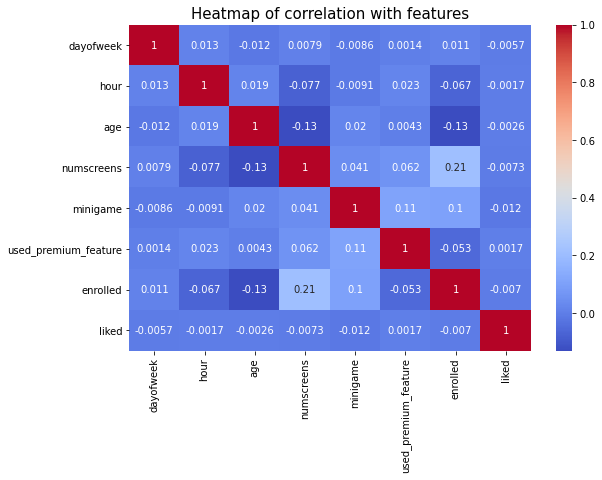

In [15]:
# heatmap of integer columns
plt.figure(figsize=(9,6))
sns.heatmap(dv_app.corr(),annot=True,cmap='coolwarm')
plt.title('Heatmap of correlation with features',fontdict={'fontsize':15})

In [16]:
# sns.pairplot(data=dv_app,hue='enrolled')

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='enrolled', ylabel='count'>

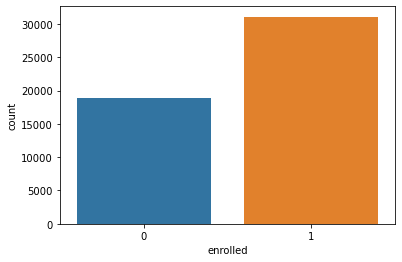

In [17]:
sns.countplot(dv_app.enrolled)

In [18]:
# How many enrolled or not
print('enrolled :{} , out of 50000\nnot enrolled :{} , out of 50000'.format((dv_app['enrolled']>0).sum(),(dv_app['enrolled']<1).sum()))

enrolled :31074 , out of 50000
not enrolled :18926 , out of 50000


In [19]:
# plt.figure(figsize=(16,9))
# for i,features in enumerate(app.columns):
#     plt.subplot(3,3,i+1)
#     plt.title('Histogram of : {}'.format(features),fontdict={'fontsize':15})
#     bins = len(app[features].unique())
#     plt.hist(app,bins=bins,color='g',rwidth=0.8,edgecolor='y',linewidth=2)

# plt.subplots_adjust(hspace=0.5,wspace=0.3)

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


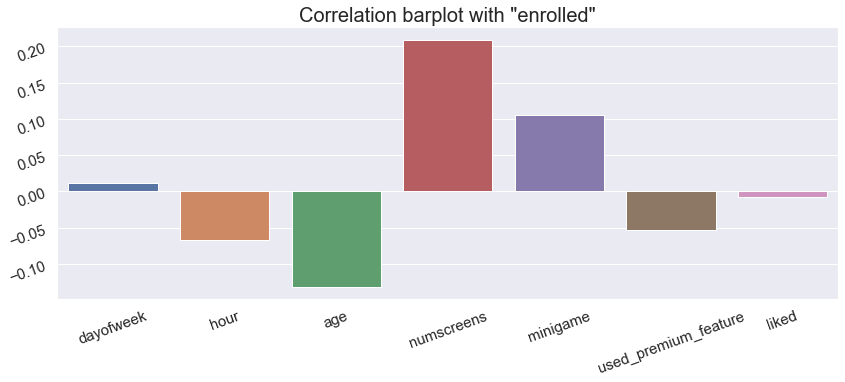

In [20]:
# all features correlated with the target feature (enrolled)
sns.set()  # for dark grid background
plt.figure(figsize=(14,5))
plt.title('Correlation barplot with "enrolled"',fontsize=20)
x = dv_app.drop(columns=['enrolled'])
y = x.corrwith(app['enrolled'])
ax = sns.barplot(x.columns,y)

ax.tick_params(labelsize=15,labelrotation=20,color='g')  # decorate x,y

In [21]:
# date time objects  convert into a datetime data types
from dateutil import parser

app['first_open'] = [parser.parse(i) for i in app['first_open']]
app['enrolled_date']  = [parser.parse(i) if isinstance(i,str) else i for i in app['enrolled_date']]

In [22]:
app.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [23]:
app['time_to_enrolled'] = (app['enrolled_date']-app['first_open']).astype('timedelta64[h]')

In [24]:
app.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked,time_to_enrolled
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaT,0,NaN
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaT,0,NaN
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaT,1,NaN
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0,0.0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1,0.0


(array([20885.,   625.,   337.,   207.,   159.,   129.,   133.,   109.,
          108.,   101.,    91.,    84.,    73.,    76.,    68.,    72.,
           73.,    85.,    69.,    64.,    76.,    67.,   172.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <BarContainer object of 23 artists>)

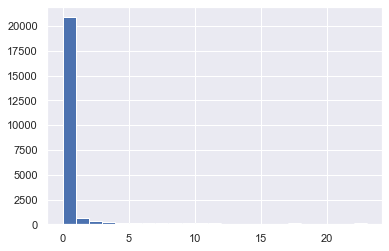

In [25]:
plt.hist(app['time_to_enrolled'].dropna(),range(0,24))

In [26]:
app.drop(columns=['time_to_enrolled','first_open','enrolled_date','user'],inplace=True)
app.head()

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1


In [27]:
# get seconde file into array form
top_screens = pd.read_csv('../Dataset/top_screens.csv').top_screens.values
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

using top screens create columns as a feature

In [28]:
app['screen_list'] = app['screen_list'].astype(str)+','

In [29]:
# convert value in a number
for i in top_screens:
    app[i] = app['screen_list'].str.contains(i).astype(int)
    app['screen_list'] = app['screen_list'].str.replace(i+',','')

In [30]:
(app['screen_list'].str.contains('splash').astype(int)).head()

0    0
1    0
2    0
3    0
4    0
Name: screen_list, dtype: int32

In [31]:
(app['screen_list'].str.replace('splash'+',','')).head()

0    joinscreen,product_review,ScanPreview,VerifyTo...
1    joinscreen,product_review,product_review2,Scan...
2                                                     
3    product_review,Home,product_review,ReferralCon...
4    joinscreen,ScanPreview,VerifySSN,Home,SelectIn...
Name: screen_list, dtype: object

In [32]:
app.loc[0,['screen_list']]

screen_list    joinscreen,product_review,ScanPreview,VerifyTo...
Name: 0, dtype: object

In [33]:
app.screen_list.str.count(',').head()

0     7
1     5
2     0
3     6
4    10
Name: screen_list, dtype: int64

In [34]:
# creat a new column for counted numbers in remain_screen_list
app['remain_screen_list'] = app.screen_list.str.count(',')

In [35]:
app.head()

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,Loan2,location,Institutions,Credit3Container,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Credit3Dashboard,Loan3,CC1Category,Splash,Loan,CC1,RewardsContainer,Credit3,Credit1,EditProfile,Credit2,Finances,CC3,Saving9,Saving1,Alerts,Saving8,Saving10,Leaderboard,Saving4,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,Saving7,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,Saving2,Saving6,Saving2Amount,Saving5,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,Loan4,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list
0,3,2,23,"joinscreen,product_review,ScanPreview,VerifyTo...",15,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,7
1,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
2,1,19,23,,3,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,16,28,"product_review,Home,product_review,ReferralCon...",40,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
4,1,18,31,"joinscreen,ScanPreview,VerifySSN,Home,SelectIn...",32,0,0,1,1,1,0,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10


In [36]:
app.columns,app.shape

(Index(['dayofweek', 'hour', 'age', 'screen_list', 'numscreens', 'minigame',
        'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
        'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
        'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
        'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
        'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
        'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
        'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
        'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
        'ProfileChildren ', 'ProfileEducation', 'Saving7',
        'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
        'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
        'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
        'SecurityModal'

In [37]:
# to multiple screens convert into one screen
saving_scr=['Saving1','Saving2','Saving2Amount','Saving4',
            'Saving5','Saving6','Saving7','Saving8',
            'Saving9','Saving10']

app['seving_scr_count'] = app[saving_scr].sum(axis=1)
app.drop(columns=saving_scr,inplace=True)

credit_scr = [
    'Credit1',
    'Credit2',
    'Credit3',
    'Credit3Container',
    'Credit3Dashboard'
]
app['credit_scr_count'] = app[credit_scr].sum(axis=1)
app.drop(columns=credit_scr,inplace=True)

cc_scr = [
    'CC1',
    'CC1Category',
    'CC3'
]
app['cc_scr_count'] = app[cc_scr].sum(axis=1)
app.drop(columns=cc_scr,inplace=True)

loan_scr = [
    'Loan',
    'Loan2',
    'Loan3',
    'Loan4'
]
app['loan_scr_count'] = app[loan_scr].sum(axis=1)
app.drop(columns=loan_scr,inplace=True)


In [38]:
app.shape

(50000, 50)

In [39]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dayofweek                50000 non-null  int64 
 1   hour                     50000 non-null  int32 
 2   age                      50000 non-null  int64 
 3   screen_list              50000 non-null  object
 4   numscreens               50000 non-null  int64 
 5   minigame                 50000 non-null  int64 
 6   used_premium_feature     50000 non-null  int64 
 7   enrolled                 50000 non-null  int64 
 8   liked                    50000 non-null  int64 
 9   location                 50000 non-null  int32 
 10  Institutions             50000 non-null  int32 
 11  VerifyPhone              50000 non-null  int32 
 12  BankVerification         50000 non-null  int32 
 13  VerifyDateOfBirth        50000 non-null  int32 
 14  ProfilePage              50000 non-nul

In [40]:
app.describe(include='all')

,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked,location,Institutions,VerifyPhone,BankVerification,VerifyDateOfBirth,ProfilePage,VerifyCountry,Cycle,idscreen,Splash,RewardsContainer,EditProfile,Finances,Alerts,Leaderboard,VerifyMobile,VerifyHousing,RewardDetail,VerifyHousingAmount,ProfileMaritalStatus,ProfileChildren,ProfileEducation,ProfileEducationMajor,Rewards,AccountView,VerifyAnnualIncome,VerifyIncomeType,ProfileJobTitle,Login,ProfileEmploymentLength,WebView,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,remain_screen_list,seving_scr_count,credit_scr_count,cc_scr_count,loan_scr_count
count,50000.000000,50000.000000,50000.00000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
unique,NaN,NaN,NaN,18209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,"Home,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.029860,12.557220,31.72436,NaN,21.095900,0.107820,0.172020,0.621480,0.165000,0.517760,0.293660,0.524600,0.319540,0.473480,0.158040,0.423160,0.364860,0.340700,0.200760,0.084000,0.048980,0.076540,0.073720,0.051520,0.053860,0.045080,0.030920,0.041420,0.047560,0.0,0.0455,0.041060,0.024420,0.026220,0.023580,0.031760,0.022460,0.029800,0.021160,0.096560,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,2.031997,7.438072,10.80331,NaN,15.728812,0.310156,0.377402,0.485023,0.371184,0.499689,0.455443,0.499399,0.466303,0.499301,0.364782,0.494065,0.481396,0.473949,0.400573,0.277391,0.215828,0.265863,0.261317,0.221058,0.225743,0.207482,0.173103,0.199262,0.212836,0.0,0.2084,0.198431,0.154351,0.159791,0.151738,0.175362,0.148176,0.170037,0.143919,0.295361,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,0.000000,0.000000,16.00000,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1.000000,5.000000,24.00000,NaN,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,3.000000,14.000000,29.00000,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0000,0.000000,0.000000,0.000000,0.000000,0.

In [41]:
app['ProfileChildren '].unique()

array([0])

<AxesSubplot:title={'center':'Heatmap with Correlation of new Data'}>

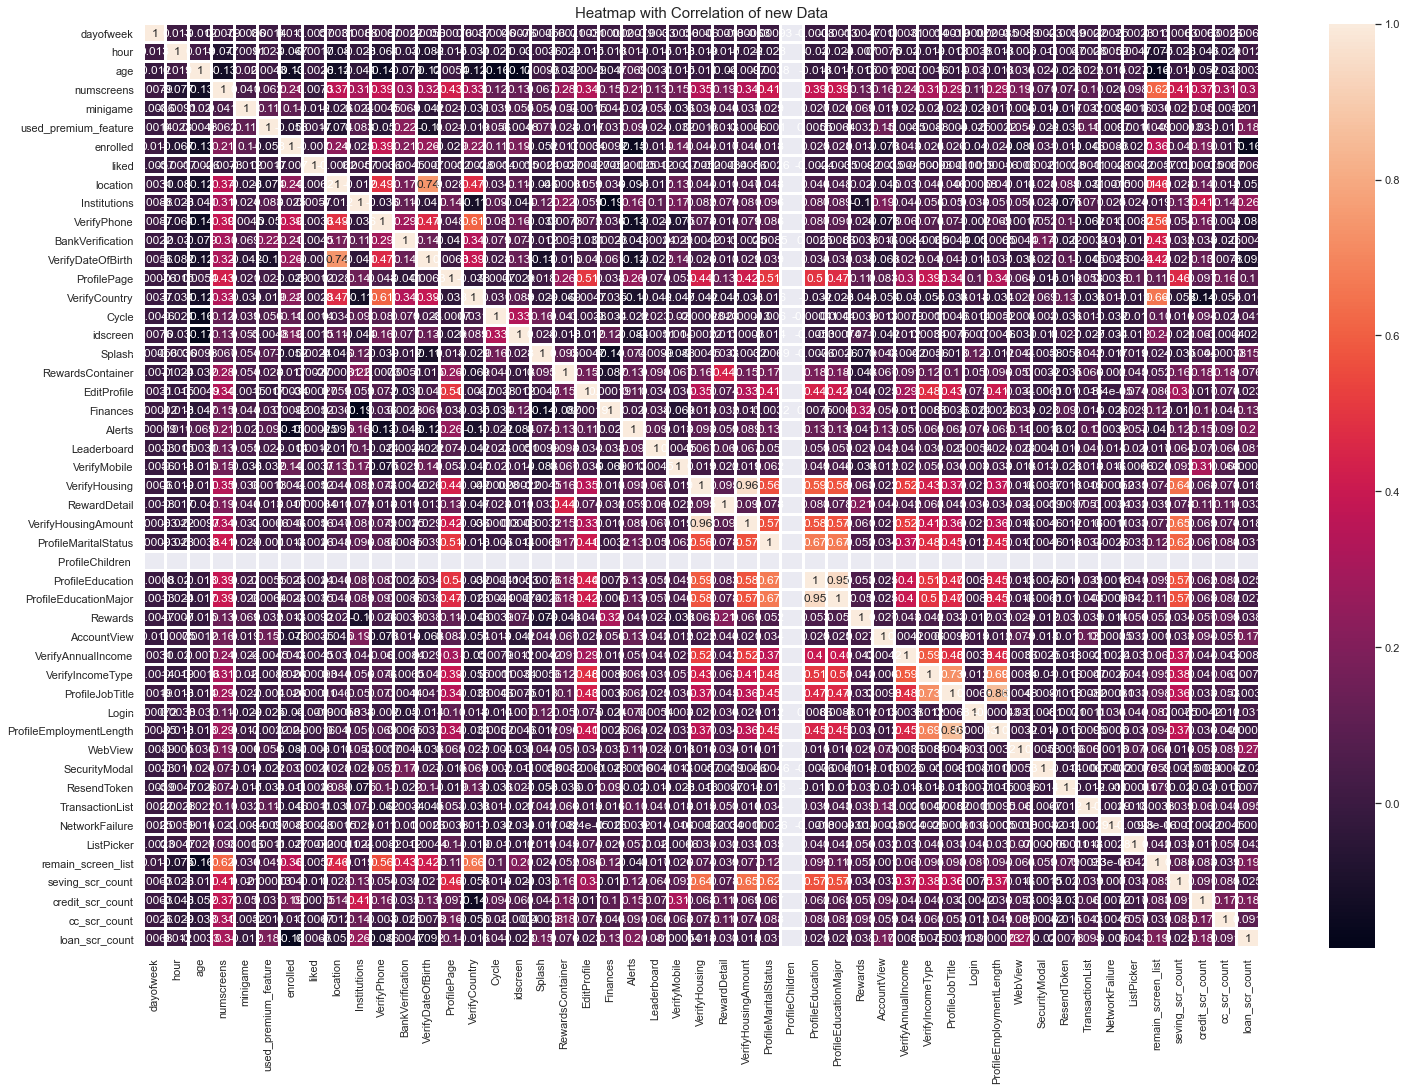

In [42]:
plt.figure(figsize=(25,17))
plt.title('Heatmap with Correlation of new Data',fontsize=15)
sns.heatmap(app.corr(),annot=True,linewidth=2)


In [43]:
high_corr = app.corr()
high_corr_features = high_corr.index[abs(high_corr['enrolled'])>0.1]
high_corr_features

Index(['age', 'numscreens', 'minigame', 'enrolled', 'location', 'VerifyPhone',
       'BankVerification', 'VerifyDateOfBirth', 'VerifyCountry', 'Cycle',
       'idscreen', 'Alerts', 'VerifyMobile', 'remain_screen_list',
       'credit_scr_count', 'loan_scr_count'],
      dtype='object')

In [44]:
app['ProfileChildren '].unique()

array([0])

In [45]:
app.drop(columns=['ProfileChildren ','screen_list'],inplace=True)

In [46]:
app.shape

(50000, 48)

c:\program files\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

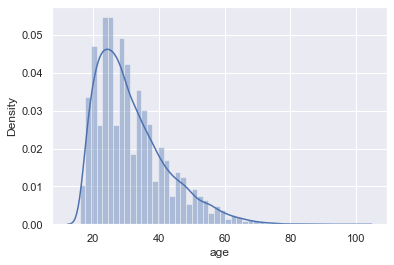

In [47]:
sns.distplot(app['age'])

c:\program files\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


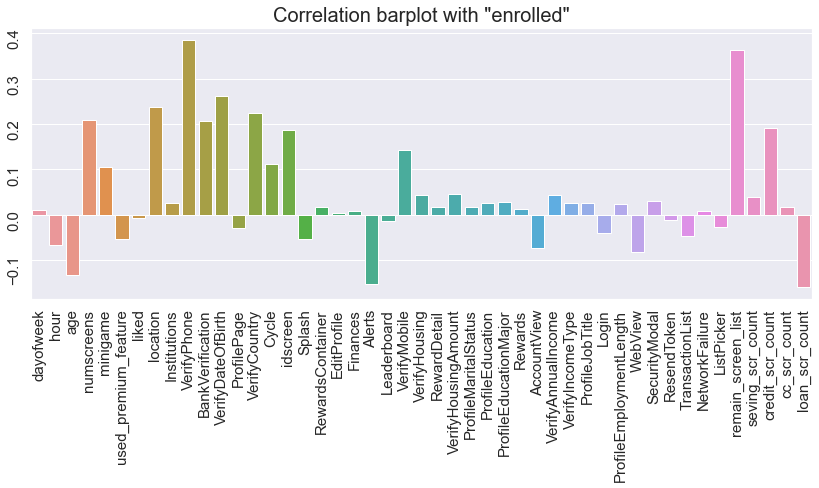

In [48]:
# all features correlated with the target feature (enrolled)
sns.set()  # for dark grid background
plt.figure(figsize=(14,5))
plt.title('Correlation barplot with "enrolled"',fontsize=20)
x = app.drop(columns=['enrolled'])
y = x.corrwith(app['enrolled'])
ax = sns.barplot(x.columns,y)

ax.tick_params(labelsize=15,labelrotation=90,color='g')  # decorate x,y

## Data Preprocessing

### Data Spliting in Train Or Test set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(app.drop(columns=['enrolled']),app['enrolled'],test_size=0.2,random_state=51)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((40000, 47), (40000,), (10000, 47), (10000,))

### Feature Scalling- Standard scaler

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
sc = StandardScaler()
sc.fit(x_train)

x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

## Machine Learning Model Building

In [53]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score

In [54]:
def model(estimator,x=x_train_sc,y=y_train,z=x_test_sc,a=y_test,cv=10):
    estimator.fit(x,y)
    y_pred = estimator.predict(z)
    ac = accuracy_score(a,y_pred)
    mse = mean_squared_error(a,y_pred)
    print('cross_val_score : ',(cross_val_score(estimator,x,y)).mean())
    return 'accuracy: ',ac,'mse : ',mse,'rmse : ',np.sqrt(mse)

### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
lr  = LogisticRegression()
lr.fit(x_train_sc,y_train)
y_pred = lr.predict(x_test_sc)
accuracy_score(y_test,y_pred),mean_squared_error(y_test,y_pred)
cross_val_score(lr,x_train_sc,y_train)
# cross_validate(lr,x_train_sc,y_train)
model(lr)

cross_val_score :  0.758225


('accuracy: ', 0.7457, 'mse : ', 0.2543, 'rmse : ', 0.5042816673249187)

### Decision Tree Classifier

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
dtc = DecisionTreeClassifier(max_depth=9)

In [59]:
model(dtc)

cross_val_score :  0.7716999999999999


('accuracy: ', 0.7621, 'mse : ', 0.2379, 'rmse : ', 0.4877499359302879)

### KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:
knn = KNeighborsClassifier()
# model(knn)

In [62]:
# model(KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2))

### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier()
model(rfc)

cross_val_score :  0.7852


('accuracy: ', 0.7735, 'mse : ', 0.2265, 'rmse : ', 0.47592016137163173)

### Naive Bayes

In [65]:
from sklearn.naive_bayes import GaussianNB

In [66]:
nb = GaussianNB()
# model(nb)

### Support Vector Classifier

In [67]:
from sklearn.svm import SVC

In [68]:
svc = SVC()
# model(svc)

### Rondom Forest Model Building

In [69]:
model(rfc,cv=100)

cross_val_score :  0.7852250000000001


('accuracy: ', 0.776, 'mse : ', 0.224, 'rmse : ', 0.4732863826479693)

In [70]:
# build model
rfc2 = RandomForestClassifier(n_estimators=500,n_jobs=None,verbose=0,ccp_alpha=0.0)
rfc2.fit(x_train_sc,y_train)

y_pred_rfc = rfc2.predict(x_test_sc)
accuracy_score(y_test,y_pred_rfc)   # rfc2

0.7764

In [71]:
# without scaled data set
# rfc.fit(x_train,y_train)
# y_pred_r = rfc.predict(x_test)
# accuracy_score(y_test,y_pred_r)

### Confusion Matrix

In [72]:
cofm = confusion_matrix(y_test,y_pred_rfc)
cofm

array([[2660, 1231],
       [1005, 5104]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

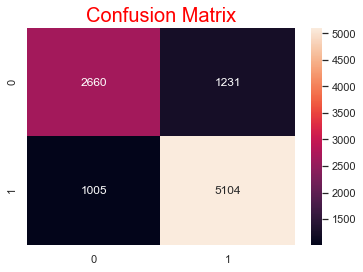

In [73]:
sns.heatmap(cofm,annot=True,fmt='g')
plt.title('Confusion Matrix',fontsize=20,color='red')

In [74]:
from sklearn.metrics import plot_confusion_matrix

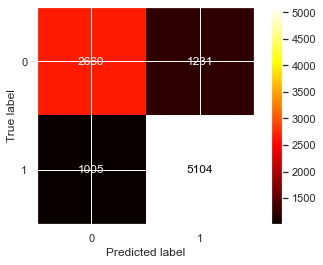

In [75]:
plot_confusion_matrix(rfc2,x_test_sc,y_test,cmap='hot')

### Classification Report

In [76]:
cr = classification_report(y_test,y_pred_rfc)

In [77]:
print(cr)

              precision    recall  f1-score   support

           0       0.73      0.68      0.70      3891
           1       0.81      0.84      0.82      6109

    accuracy                           0.78     10000
   macro avg       0.77      0.76      0.76     10000
weighted avg       0.77      0.78      0.78     10000



### Mapping Predict output to the target

In [78]:
y_test_df = pd.DataFrame(y_test.values,columns=['y_test'])
y_test_df['y_predict'] = y_pred

In [79]:
y_test_df.head(20)

,y_test,y_predict
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,0,0
9,1,1


### Save Model Using Joblib

In [80]:
# save csv file for improvement 
app_imp = pd.DataFrame.to_csv(app,'app_improvement.csv')

In [81]:
import joblib

In [82]:
joblib.dump(rfc2,'../model/model.pkl')

['../model/model.pkl']

In [87]:
# load model and test
model = joblib.load('../model/model.joblib')

# your model trained with scaled data so you need to your test set become scaled.
pred = model.predict(x_test_sc)
pred

MemoryError: Unable to allocate 910. KiB for an array with shape (19419,) and data type {'names':['left_child','right_child','feature','threshold','impurity','n_node_samples','weighted_n_node_samples'], 'formats':['<i4','<i4','<i4','<f8','<f8','<i4','<f8'], 'offsets':[0,4,8,16,24,32,40], 'itemsize':48}

In [ ]:
pred_ = pd.DataFrame(y_test.values,columns=['y_test'])
pred_['predicted value'] = y_pred_rfc

In [ ]:
pred_.head()

model.joblib   # main file,                       
readme.md      # project details

# Project End